In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
crash=pd.read_excel('Crash_Data 1.xlsx')

In [6]:
crash

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,","
0,20212133,Vic,9,2021,Sunday,00:30:00,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31:00,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25:00,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,05:15:00,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05:00,Single,Yes,NaN,No,...,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,06:00:00,Single,No,NaN,No,...,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,06:00:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,06:00:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day


In [7]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

In [9]:
crash['Speed Limit']=crash['Speed Limit'].fillna(0)
crash['Speed Limit']=crash['Speed Limit'].replace({'Unspecified':0,'<40':40}).astype(int)

In [10]:
acc=crash.groupby('Dayweek')['Dayweek'].count()
acc

Dayweek
Friday       8665
Monday       6108
Saturday     9696
Sunday       8460
Thursday     7106
Tuesday      6145
Wednesday    6663
Name: Dayweek, dtype: int64

In [11]:
Name=acc.index
Values=acc.values

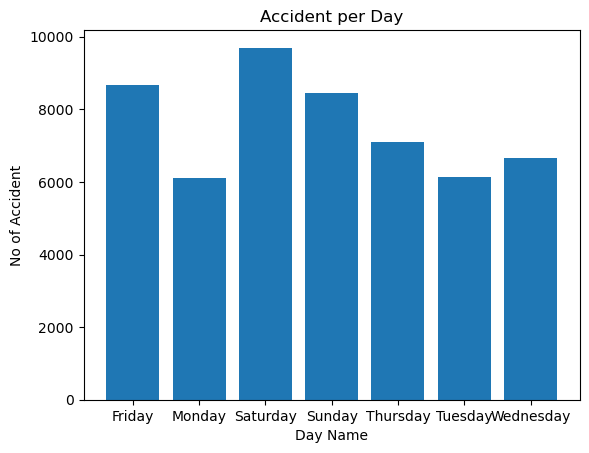

In [13]:
plt.bar(Name,Values)
plt.title('Accident per Day')
plt.xlabel('Day Name')
plt.ylabel('No of Accident')
plt.show()

In [14]:
speed=crash.groupby('Road User')['Speed Limit'].mean()

In [15]:
Name1=speed.index
Value1=speed.values

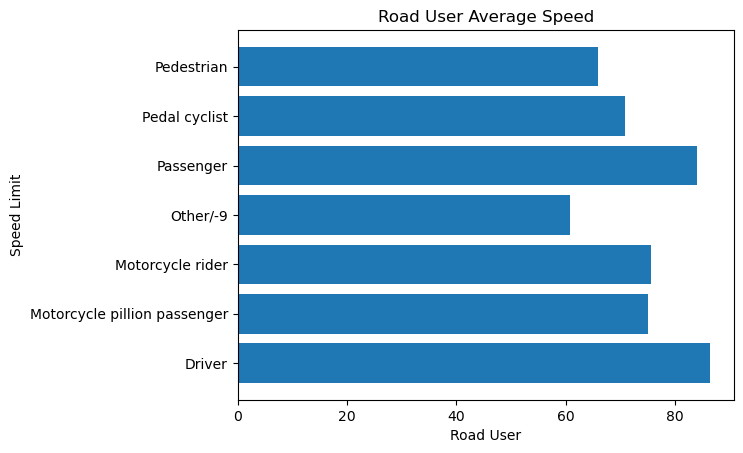

In [18]:
plt.barh(Name1,Value1)
plt.title('Road User Average Speed')
plt.xlabel('Road User')
plt.ylabel('Speed Limit')
plt.show()

In [19]:
roadu=crash.groupby('Road User')['Road User'].count()
roadu

Road User
Driver                          23816
Motorcycle pillion passenger      363
Motorcycle rider                 6637
Other/-9                           92
Passenger                       12269
Pedal cyclist                    1424
Pedestrian                       8242
Name: Road User, dtype: int64

In [20]:
Names=roadu.index
Value=roadu.values

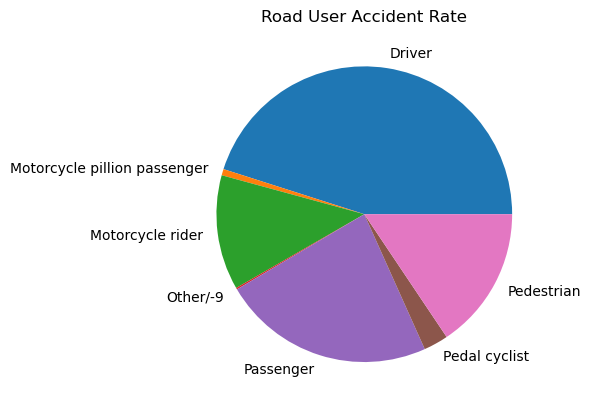

In [38]:
plt.pie(Value,labels=Names)
plt.title('Road User Accident Rate')
plt.show()

In [22]:
gender=crash.groupby('Gender')['Gender'].count()
gender

Gender
Female         15002
Male           37813
Unspecified        1
Name: Gender, dtype: int64

In [24]:
Gender=gender.index
Total=gender.values

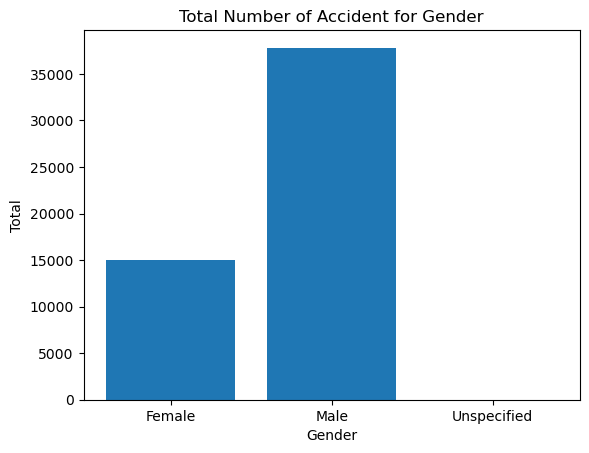

In [27]:
plt.bar(Gender,Total)
plt.title('Total Number of Accident for Gender')
plt.xlabel('Gender')
plt.ylabel('Total')
plt.show()

In [28]:
age=crash.groupby('Road User')['Age'].mean()
age

Road User
Driver                          41.397674
Motorcycle pillion passenger    28.311295
Motorcycle rider                35.017026
Other/-9                        36.434783
Passenger                       34.481213
Pedal cyclist                   38.610955
Pedestrian                      46.819097
Name: Age, dtype: float64

In [29]:
Age=age.index
Average=age.values

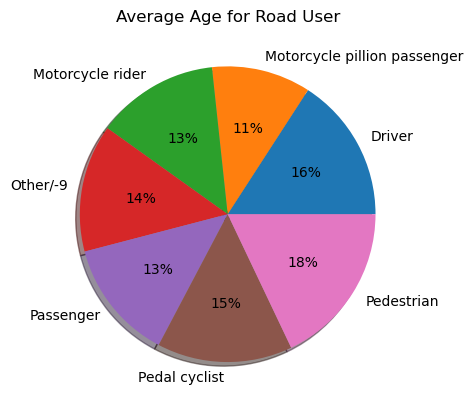

In [32]:
plt.pie(Average,labels=Age,autopct='%1.0f%%',shadow=True)
plt.title('Average Age for Road User')
plt.show()

In [33]:
dayofweek=crash.groupby('Day of week')['Day of week'].count()
dayofweek

Day of week
Weekday    31066
Weekend    21777
Name: Day of week, dtype: int64

In [34]:
Days=dayofweek.index
Num=dayofweek.values

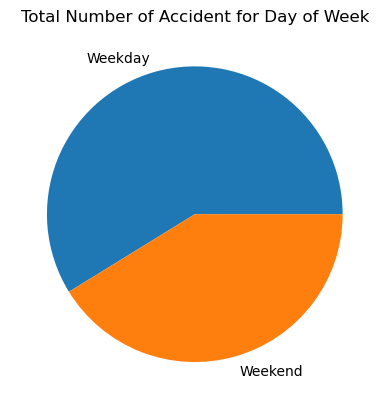

In [37]:
plt.pie(Num,labels=Days)
plt.title('Total Number of Accident for Day of Week')
plt.show()

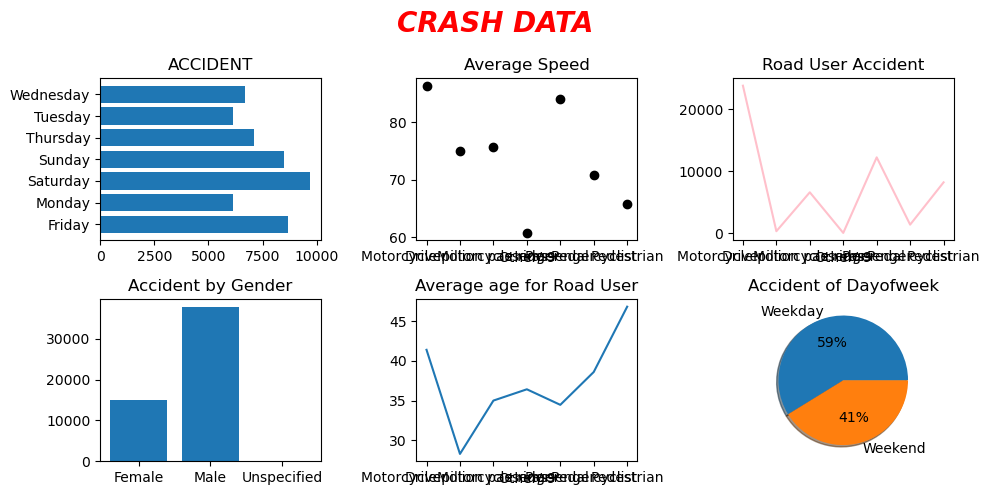

In [46]:
fig,ag=plt.subplots(nrows=2,ncols=3,figsize=(10,5))
fig.suptitle('CRASH DATA',fontsize=20,fontstyle='oblique',fontweight='bold',c='r')
ag[0,0].barh(Name,Values)
ag[0,0].set(title='ACCIDENT')

ag[0,1].scatter(Name1,Value1,c='black')
ag[0,1].set(title='Average Speed')

ag[0,2].plot(Names,Value,c='pink')
ag[0,2].set(title='Road User Accident')

ag[1,0].bar(Nims,Vals)
ag[1,0].set(title='Accident by Gender')

ag[1,1].plot(Age,Average)
ag[1,1].set(title='Average age for Road User')

ag[1,2].pie(Num,labels=Days,autopct='%1.0f%%',shadow=True)
ag[1,2].set(title='Accident of Dayofweek')

plt.tight_layout()
plt.savefig('Crash Datas.png')
plt.show()